In [44]:
od.download("https://www.kaggle.com/geomack/spotifyclassification", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aryakapoor123
Your Kaggle Key: ········


100%|██████████████████████████████████████| 98.4k/98.4k [00:00<00:00, 6.43MB/s]

In [45]:
os.getcwd()

'/Users/aryakapoor'

In [46]:
songs=pd.read_csv('/Users/aryakapoor/Downloads/data.csv')

In [47]:
songs

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [62]:
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns
import io
from scipy import misc
import imageio


In [63]:
train,test=train_test_split(songs, test_size=0.15)

In [64]:
red_blue=['#1985FE', '#EF4836']
palette=sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [65]:
pos_tempo=songs[songs['target']==1]['tempo']
neg_tempo=songs[songs['target']==0]['tempo']

pos_dance=songs[songs['target']==1]['danceability']
neg_dance=songs[songs['target']==0]['danceability']

pos_acous=songs[songs['target']==1]['acousticness']
neg_acous=songs[songs['target']==0]['acousticness']

pos_dur=songs[songs['target']==1]['duration_ms']
neg_dur=songs[songs['target']==0]['duration_ms']

pos_en=songs[songs['target']==1]['energy']
neg_en=songs[songs['target']==0]['energy']

pos_key=songs[songs['target']==1]['key']
neg_key=songs[songs['target']==0]['key']

pos_live=songs[songs['target']==1]['liveness']
neg_live=songs[songs['target']==0]['liveness']

pos_loud=songs[songs['target']==1]['loudness']
neg_loud=songs[songs['target']==0]['loudness']

pos_speech=songs[songs['target']==1]['speechiness']
neg_speech=songs[songs['target']==0]['speechiness']

pos_valence=songs[songs['target']==1]['valence']
neg_valence=songs[songs['target']==0]['valence']

pos_inst=songs[songs['target']==1]['instrumentalness']
neg_inst=songs[songs['target']==0]['instrumentalness']


<AxesSubplot:title={'center':'Song Instrumentalness Like Distribution'}, xlabel='Instrumentalness', ylabel='Count'>

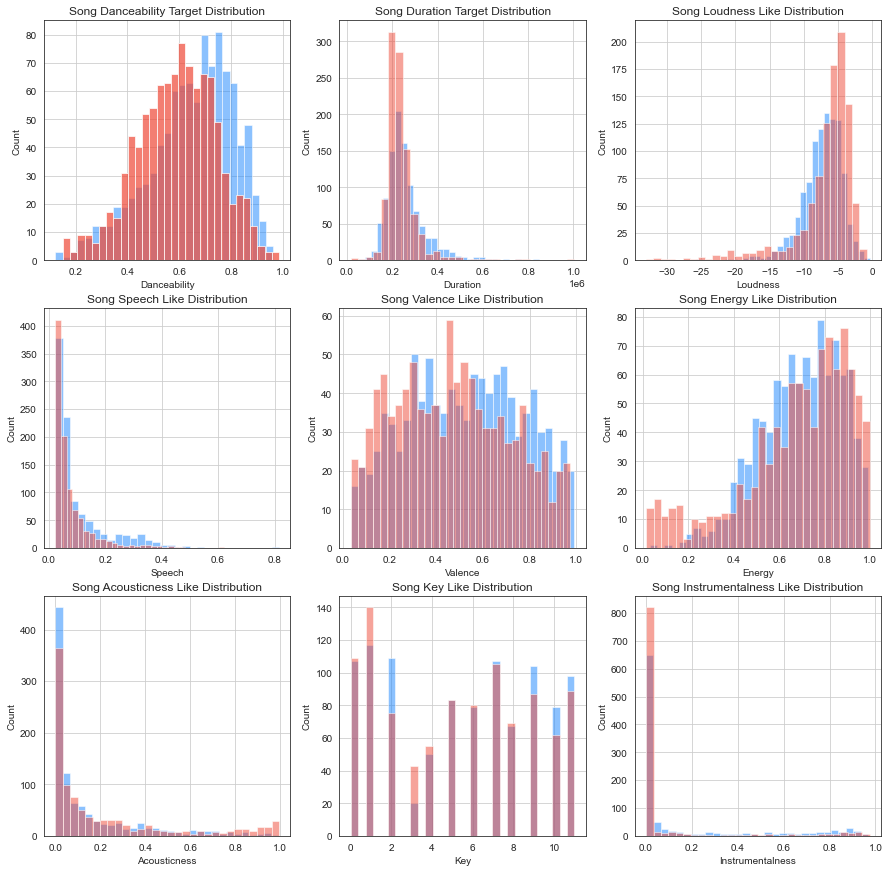

In [80]:
fig2=plt.figure(figsize=(15,15))

ax3=fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Target Distribution')
pos_dance.hist(alpha=0.5, bins=30)
neg_dance.hist(alpha=0.7,bins=30)

ax5=fig2.add_subplot(332)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Target Distribution')
pos_dur.hist(alpha=0.5, bins=30)
neg_dur.hist(alpha=0.5,bins=30)

ax7=fig2.add_subplot(333)
pos_loud.hist(alpha=0.5, bins=30)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title("Song Loudness Like Distribution")
neg_loud.hist(alpha=0.5, bins=30)

ax9=fig2.add_subplot(334)
pos_speech.hist(alpha=0.5, bins=30)
ax9.set_xlabel('Speech')
ax9.set_ylabel('Count')
ax9.set_title("Song Speech Like Distribution")
neg_speech.hist(alpha=0.5, bins=30)

ax11=fig2.add_subplot(335)
pos_valence.hist(alpha=0.5, bins=30)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title("Song Valence Like Distribution")
neg_valence.hist(alpha=0.5, bins=30)

ax13=fig2.add_subplot(336)
pos_en.hist(alpha=0.5, bins=30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title("Song Energy Like Distribution")
neg_en.hist(alpha=0.5, bins=30)

ax15=fig2.add_subplot(337)
pos_acous.hist(alpha=0.5, bins=30)
ax15.set_xlabel('Acousticness')
ax15.set_ylabel('Count')
ax15.set_title("Song Acousticness Like Distribution")
neg_acous.hist(alpha=0.5, bins=30)


ax17=fig2.add_subplot(338)
pos_key.hist(alpha=0.5, bins=30)
ax17.set_xlabel('Key')
ax17.set_ylabel('Count')
ax17.set_title("Song Key Like Distribution")
neg_key.hist(alpha=0.5, bins=30)


ax20=fig2.add_subplot(339)
pos_inst.hist(alpha=0.5, bins=30)
ax20.set_xlabel('Instrumentalness')
ax20.set_ylabel('Count')
ax20.set_title("Song Instrumentalness Like Distribution")
neg_inst.hist(alpha=0.5, bins=30)


In [68]:
x=DecisionTreeClassifier(min_samples_split=100)

In [69]:
features=['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'loudness', 'speechiness', 'valence']

In [70]:
x_train=train[features]
y_train=train['target']

x_test=test[features]
y_test=test['target']

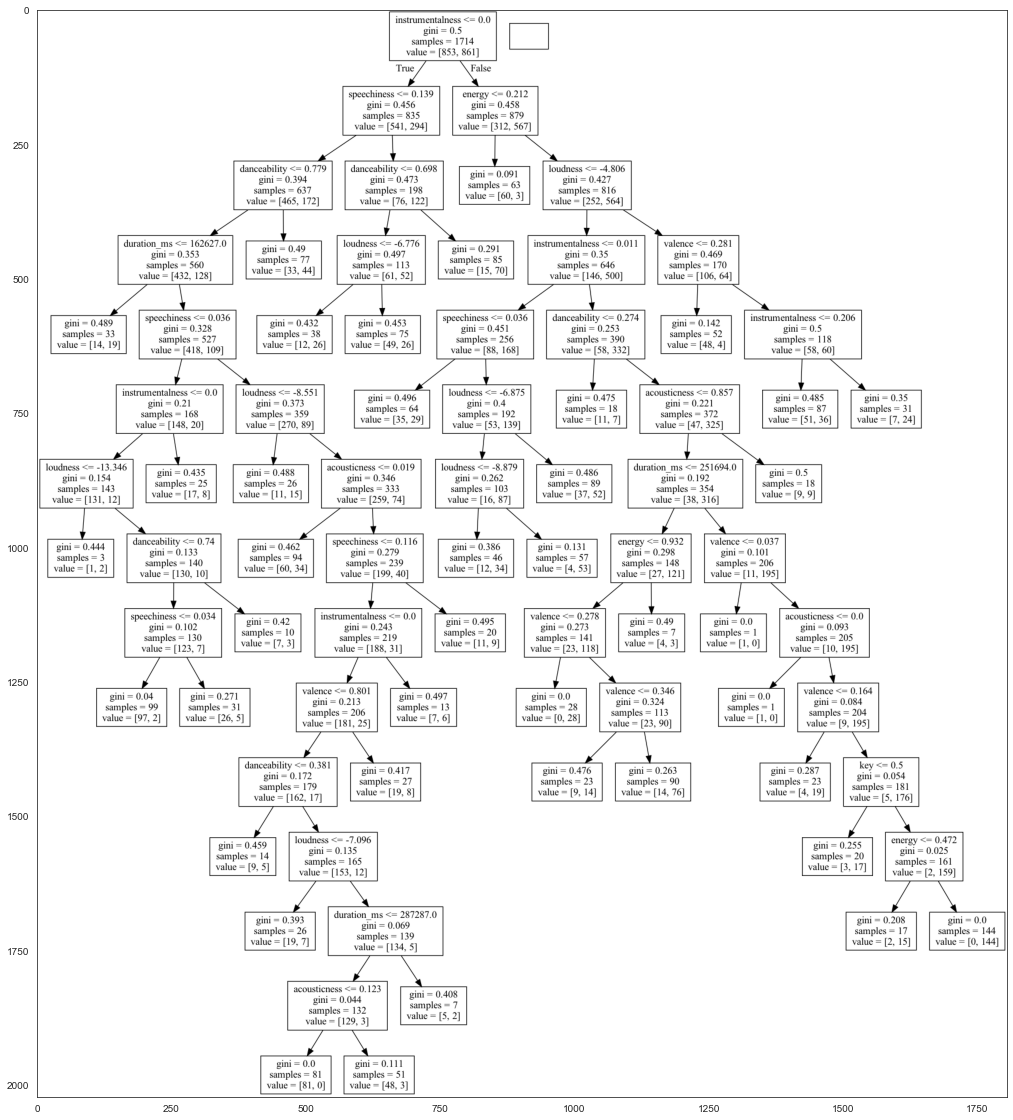

In [72]:
decision_tree=x.fit(x_train,y_train)

def show_tree(tree, features, path):
    f=io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=imageio.imread(path)
    plt.rcParams['figure.figsize']=(20,20)
    plt.imshow(img)

show_tree(decision_tree, features, 'dec_tree_01.png')

In [76]:
y_pred=x.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

In [78]:
score= accuracy_score(y_pred, y_test)*100

In [79]:
score

68.64686468646865